In [1]:
pip install mlxtend scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [46]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

<H2> MODULE 1: ASSOCIATION RULES </H2>

<h3> 1. Downloading & Loading the Dataset </h3>

In [28]:
import pandas as pd

df = pd.read_csv('market.csv', sep=';')  # Contains binary indicators per item


In [30]:
print(df.shape)

(464, 22)


In [32]:
print(df.head())

   Bread  Honey  Bacon  Toothpaste  Banana  Apple  Hazelnut  Cheese  Meat  \
0      1      0      1           0       1      1         1       0     0   
1      1      1      1           0       1      1         1       0     0   
2      0      1      1           1       1      1         1       1     1   
3      1      1      0           1       0      1         0       0     0   
4      0      1      0           0       0      0         0       0     0   

   Carrot  ...  Milk  Butter  ShavingFoam  Salt  Flour  HeavyCream  Egg  \
0       1  ...     0       0            0     0      0           1    1   
1       0  ...     1       1            0     0      1           0    0   
2       0  ...     1       0            1     1      1           1    1   
3       0  ...     1       0            0     0      1           0    1   
4       0  ...     0       0            0     0      0           0    0   

   Olive  Shampoo  Sugar  
0      0        0      1  
1      1        1      0  
2    

<h3> 2. Preprocessing </h3>

In [34]:
df = df.drop_duplicates().reset_index(drop=True)


In [36]:
# Optionally drop transaction ID or irrelevant columns if any
X = df.select_dtypes(include=[int, 'uint8', 'bool'])  # only item columns

<h3> 3. Mining Frequent Itemsets and Generating Rules </h3>

In [38]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(X, min_support=0.01, use_colnames=True)

C:\Users\conta\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [40]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

<h3> 4. Identifying Top Rules & Visualization </h3>

In [42]:
top_rules = rules.sort_values(by=['lift', 'confidence'], ascending=False).head(20)
print(top_rules[['antecedents','consequents','support','confidence','lift']])




                                          antecedents  \
6618324       (Sugar, Onion, Egg, Hazelnut, Cucumber)   
6618145            (Milk, Banana, Honey, Salt, Bacon)   
6504140    (Carrot, Butter, Sugar, HeavyCream, Olive)   
6504365             (Apple, Toothpaste, Onion, Bread)   
6618147         (Milk, Banana, Honey, Salt, Hazelnut)   
6618148         (Milk, Banana, Honey, Salt, Cucumber)   
6618321          (Sugar, Onion, Bacon, Egg, Hazelnut)   
6618322          (Sugar, Onion, Bacon, Egg, Cucumber)   
6555713   (Butter, Banana, ShavingFoam, Flour, Honey)   
6503740       (Flour, Bacon, Bread, Cucumber, Cheese)   
6618221          (Milk, Honey, Salt, Bacon, Hazelnut)   
6503745                  (Butter, Egg, Banana, Sugar)   
6618248         (Banana, Sugar, Onion, Egg, Cucumber)   
6555804              (Carrot, Bacon, Cucumber, Sugar)   
6618121              (Milk, Banana, Sugar, Salt, Egg)   
6618222          (Milk, Honey, Salt, Bacon, Cucumber)   
6618247         (Banana, Sugar,

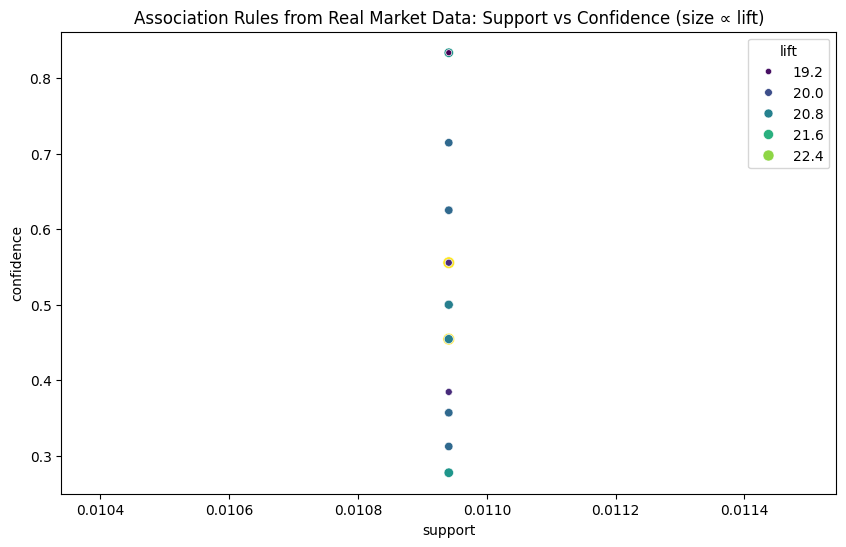

In [44]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=top_rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis', legend=True)
plt.title('Association Rules from Real Market Data: Support vs Confidence (size ∝ lift)')
plt.show()

<h3> 5. Interpretation & Strategic Insights </h3>

<H2> MODULE 2: CLASSIFICATION </H2>

In [111]:
iris = load_iris()

In [50]:
X = iris.data
y = iris.target

In [52]:
scaler = StandardScaler()

In [54]:
X_scaled = scaler.fit_transform(X)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [58]:
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "MLP": MLPClassifier(max_iter=1000, random_state=42)
}

In [60]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Cross-Validation Score:", cross_val_score(model, X_scaled, y, cv=5).mean())


Naive Bayes Results:
Accuracy: 0.98
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Cross-Validation Score: 0.9533333333333334

Decision Tree Results:
Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Cross-Validation Score: 0.9533333333333334

MLP Results:
Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Cross-Validation Score: 0.9600000000000002


<H2> MODULE 3: CLUSTERING </H2>

<H3> Importing the required libraries </H3>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')


<H3> Loading and Preprocessing the first dataset cluster </H3>

In [64]:
# Load Cluster Data
cluster_data = pd.read_csv("cluster_data.csv")

In [66]:

# Preview and clean if necessary
print(cluster_data.head())

   Feature 1  Feature 2
0   2.698582  -0.672960
1  -0.128113   4.355952
2   2.509049   5.773146
3  -1.518276   3.444886
4  -0.072283   2.883769


In [68]:
# Standardize the data
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

<H3> Loading and Preparing RFM from online retail data </H3>

In [70]:
# Load a subset of Online Retail data
retail_data = pd.read_excel("Online Retail.xlsx", nrows=20000)



In [72]:

# Clean data
retail_data.dropna(subset=['CustomerID', 'InvoiceDate', 'Quantity', 'UnitPrice'], inplace=True)
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']

In [74]:

# Reference date
snapshot_date = retail_data['InvoiceDate'].max() + pd.Timedelta(days=1)


In [76]:

# RFM calculation
rfm = retail_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'}).reset_index()


In [78]:

# Filter out zero/negative values
rfm = rfm[(rfm['Monetary'] > 0) & (rfm['Frequency'] > 0)]

In [80]:

# Prepare RFM data
rfm_data = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

<H3> Defining the Clustering and Evaluation Function </H3>

In [82]:
def cluster_and_evaluate(X_scaled, dataset_name):
    results = {}

    # KMeans
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    results['KMeans'] = {
        'Labels': kmeans_labels,
        'Silhouette': silhouette_score(X_scaled, kmeans_labels),
        'DB': davies_bouldin_score(X_scaled, kmeans_labels)
    }

    # Agglomerative
    agglo = AgglomerativeClustering(n_clusters=4)
    agglo_labels = agglo.fit_predict(X_scaled)
    results['Agglomerative'] = {
        'Labels': agglo_labels,
        'Silhouette': silhouette_score(X_scaled, agglo_labels),
        'DB': davies_bouldin_score(X_scaled, agglo_labels)
    }

    # DBSCAN
    dbscan = DBSCAN(eps=0.9, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    non_noise = dbscan_labels != -1
    if np.any(non_noise) and len(set(dbscan_labels[non_noise])) > 1:
        sil = silhouette_score(X_scaled[non_noise], dbscan_labels[non_noise])
        db = davies_bouldin_score(X_scaled[non_noise], dbscan_labels[non_noise])
    else:
        sil, db = np.nan, np.nan
    results['DBSCAN'] = {
        'Labels': dbscan_labels,
        'Silhouette': sil,
        'DB': db
    }

    # Visualize
    for algo, res in results.items():
        plt.figure(figsize=(6, 5))
        sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=res['Labels'], palette='tab10')
        plt.title(f"{algo} - {dataset_name}")
        plt.xlabel("Feature 1 (scaled)")
        plt.ylabel("Feature 2 (scaled)")
        plt.legend(title="Cluster")
        plt.tight_layout()
        plt.show()

    # Print metrics
    print(f"--- {dataset_name} ---")
    for algo, metrics in results.items():
        print(f"{algo}:\n  Silhouette Score: {metrics['Silhouette']:.4f} \n  Davies-Bouldin Index: {metrics['DB']:.4f}\n")

    return results


<H3> Running the Clustering Comparison </H3>

Processing Cluster Data CSV...


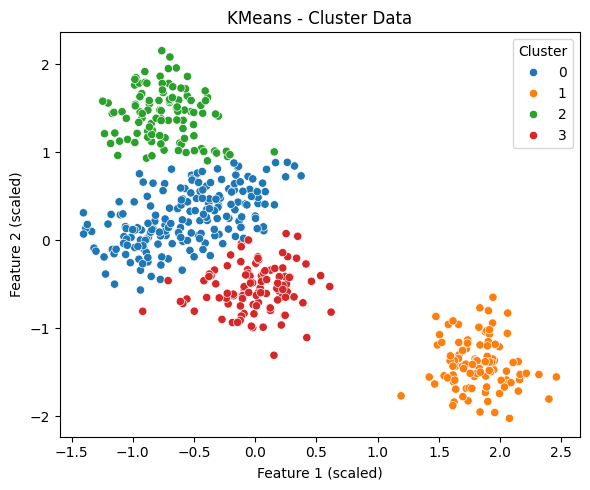

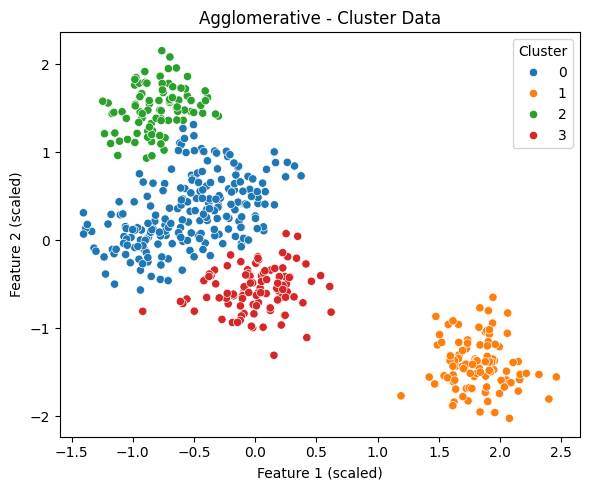

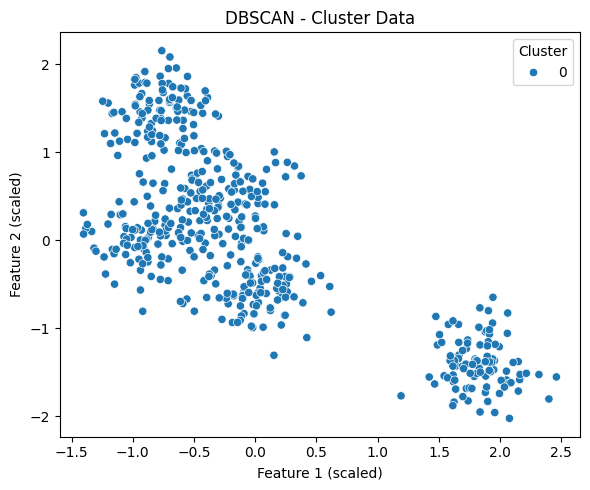

--- Cluster Data ---
KMeans:
  Silhouette Score: 0.5309 
  Davies-Bouldin Index: 0.6591

Agglomerative:
  Silhouette Score: 0.5128 
  Davies-Bouldin Index: 0.6365

DBSCAN:
  Silhouette Score: nan 
  Davies-Bouldin Index: nan



In [84]:
# Run on Cluster Data
print("Processing Cluster Data CSV...")
cluster_results = cluster_and_evaluate(cluster_scaled, "Cluster Data")

Processing Online Retail RFM Data...


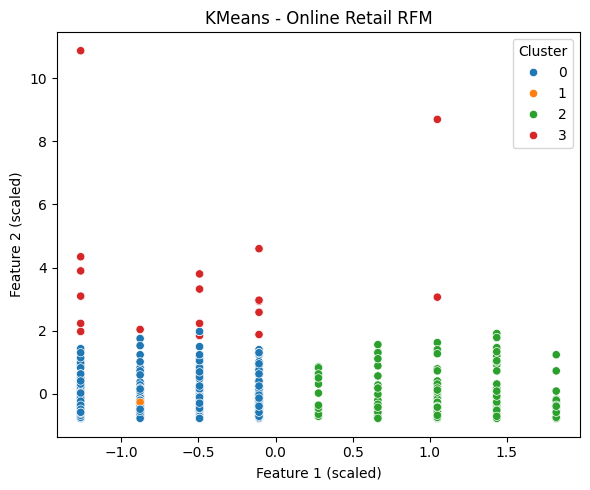

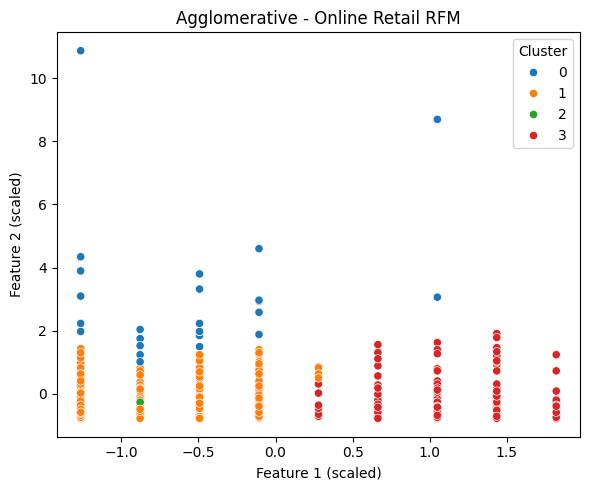

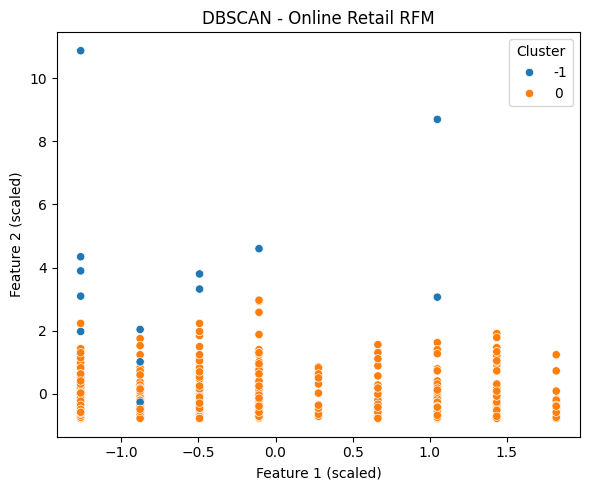

--- Online Retail RFM ---
KMeans:
  Silhouette Score: 0.4996 
  Davies-Bouldin Index: 0.6163

Agglomerative:
  Silhouette Score: 0.5031 
  Davies-Bouldin Index: 0.7784

DBSCAN:
  Silhouette Score: nan 
  Davies-Bouldin Index: nan



In [86]:

# Run on RFM Data
print("Processing Online Retail RFM Data...")
rfm_results = cluster_and_evaluate(rfm_scaled, "Online Retail RFM")

<H3> Compiling All Metrics into a Summary Table </H3>

In [88]:
summary = pd.DataFrame({
    "Dataset": ["Cluster Data", "Online Retail RFM"],
    "KMeans Silhouette": [cluster_results["KMeans"]["Silhouette"], rfm_results["KMeans"]["Silhouette"]],
    "KMeans DB": [cluster_results["KMeans"]["DB"], rfm_results["KMeans"]["DB"]],
    "Agglo Silhouette": [cluster_results["Agglomerative"]["Silhouette"], rfm_results["Agglomerative"]["Silhouette"]],
    "Agglo DB": [cluster_results["Agglomerative"]["DB"], rfm_results["Agglomerative"]["DB"]],
    "DBSCAN Silhouette": [cluster_results["DBSCAN"]["Silhouette"], rfm_results["DBSCAN"]["Silhouette"]],
    "DBSCAN DB": [cluster_results["DBSCAN"]["DB"], rfm_results["DBSCAN"]["DB"]],
})

In [90]:
print(summary)

             Dataset  KMeans Silhouette  KMeans DB  Agglo Silhouette  \
0       Cluster Data           0.530909   0.659068          0.512817   
1  Online Retail RFM           0.499604   0.616297          0.503068   

   Agglo DB  DBSCAN Silhouette  DBSCAN DB  
0  0.636542                NaN        NaN  
1  0.778410                NaN        NaN  
